In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Classificação Binária**



---


Uma tarefa de aprendizado de máquina supervisionado que é usada para prever a qual das duas classes (categorias) uma instância de dados pertence. A entrada de um algoritmo de classificação é um conjunto de exemplos rotulados, em que cada rótulo é um número inteiro de 0 ou 1. A saída de um algoritmo de classificação binária é um classificador, que pode ser usado para prever a classe de novas instâncias sem rótulo


---

Para a demostração de uma classificação binária foi implementado um modelo de KNN(k-nearest neighbours) afim de classificar o vinho em vermelho ou não.

---



##**KNN**



---



K-Nearest Neighbors ou KNN é um modelo de previsão supervisionado usado para a predição de valores tomados por uma variável dependente categórica, frequentemente binário, com base em outras variáveis independentes.

Seu funcionamento se baseia em encontrar os K vizinhos mais próximos e por voto de maioria com as labels desses vizinhos previr a label do ponto sendo analisado.


---
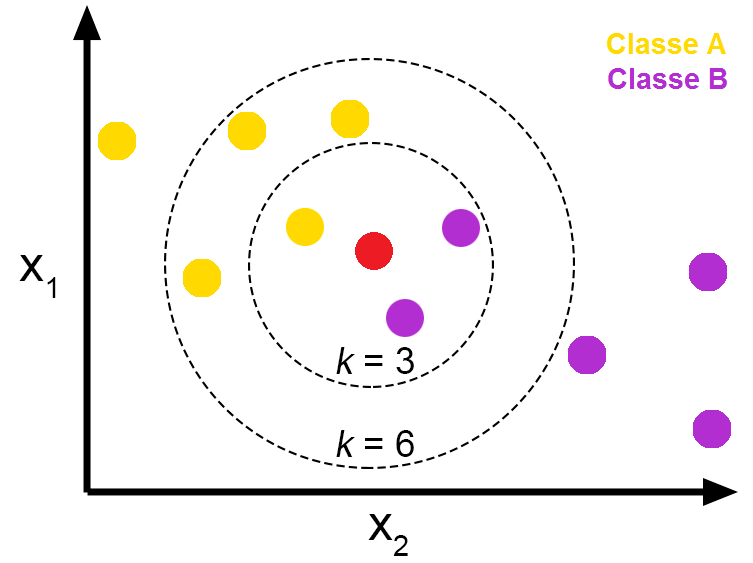


---
As distancia são calculadas com base na distância euclidiana que é descrita na formula:

---

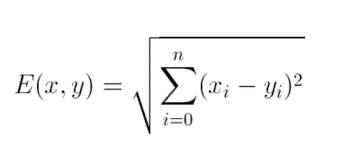

---
Para testar O modelo de KNN usaremos o Dataset do periodo que diz respeito a varias carcterísticas de vinhos e com base nisso prever se o vinho é vermelho ou não.

---





In [24]:
#criação da classe KNN


class KNN:
  def __init__(self,k):
    self.k = k


  def fit(self,x_trains,y_train):

    self.x_train = x_train
    self.y_train = y_train



  def predict(self,x_test):
    #usa a função previsão unitária todo o Dataset de treino
    labels = [self.predict_unitario(x) for x in x_test]
    return np.array(labels)


  def predict_unitario(self,x):
    #calcular distâncias euclidianas e coloca-las em uma lista
    
    
    distancias=[np.sqrt(np.sum(x-x_zinho)**2) for x_zinho in self.x_train]

    #achar as labels dos K vizinhos mais próximos
    indices=np.argsort(distancias)[:self.k]
    labels=[self.y_train[i] for i in indices]

    #retorna a label que for a  maioria
    return np.bincount(labels).argmax()



In [25]:
#Dataset

DrivePath = '/content/drive/My Drive/CIS/Trainee/part3/winequality.csv'

wine=pd.read_csv(DrivePath)

wine=wine.drop(columns='Unnamed: 0')

print(wine.isnull().values.any())

wine.describe()

False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [26]:
#seaprando o Dataset em datasets de treino e teste
    
x= wine.iloc[:,:-1].to_numpy()
y= wine.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [27]:
#treinando para K=4

knn = KNN(k=4)

knn.fit(x_train,y_train)

y=knn.predict(x_test)



In [28]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [     Vinho não vermellho                                      Vinho não vermellho       ]
#      [   classificado corretamente                             classificado incorretamente    ]
#      [                                                                                        ]
#      [      Vinho  vermellho                                         Vinho  vermellho         ]
#      [  classificado incorretamente                             classificado corretamente     ]         


cm=confusion_matrix(y,y_test)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()

print('A acurácia foi de %f '  %(Accuracy*100))


[[951 105]
 [ 36 208]]
A acurácia foi de 89.153846 


#**Random Forest**



---


Random Forest consiste em um modelo de previsão do tipo Ensemble Learning,algoritimos que possem uma característica principal que os diferenciam, a combinação de diferentes modelos para se obter um único resultado. A Random Forest irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final.

---



In [4]:
#Dataset

DrivePath = '/content/drive/My Drive/CIS/Trainee/part3/winequality.csv'

wine=pd.read_csv(DrivePath)

wine=wine.drop(columns='Unnamed: 0')

print(wine.isnull().values.any())

wine.describe()

False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
#seaprando o Dataset em datasets de treino e teste
    
x= wine.iloc[:,:-1].to_numpy()
y= wine.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)



In [6]:
#criando e treinando o modelo Random Forest

RF= RandomForestClassifier(random_state=0)

RF.fit(x_train,y_train)

y_prev=RF.predict(x_test)

In [7]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [     Vinho não vermellho                                      Vinho não vermellho       ]
#      [   classificado corretamente                             classificado incorretamente    ]
#      [                                                                                        ]
#      [      Vinho  vermellho                                         Vinho  vermellho         ]
#      [  classificado incorretamente                             classificado corretamente     ]         


cm=confusion_matrix(y_prev,y_test)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()

print('A acurácia foi de %f '  %(Accuracy*100))


[[986   2]
 [  1 311]]
A acurácia foi de 99.769231 




---


Assim podemos verificar que a acurácia do modelo atingiu cerca de 99,76% mostrando uma alta confiabilidade no modelo aplicado no DataSet estudado.

---



In [14]:
#achando a importancia de cada coluna

lista=list(RF.feature_importances_)



for i in range(len(lista)):
  print('importância da coluna %s: %f' %(wine.columns[i] ,lista[i]))

importância da coluna fixed acidity: 0.050296
importância da coluna volatile acidity: 0.125443
importância da coluna citric acid: 0.016829
importância da coluna residual sugar: 0.037493
importância da coluna chlorides: 0.247576
importância da coluna free sulfur dioxide: 0.050273
importância da coluna total sulfur dioxide: 0.315519
importância da coluna density: 0.059741
importância da coluna pH: 0.023371
importância da coluna sulphates: 0.060860
importância da coluna alcohol: 0.009553
importância da coluna quality: 0.003047


In [9]:
#ordenando a lista de importância das colunas.

indices=np.argsort(lista)
labels=[wine.columns[i] for i in indices]

print(labels)

['quality', 'alcohol', 'citric acid', 'pH', 'residual sugar', 'free sulfur dioxide', 'fixed acidity', 'density', 'sulphates', 'volatile acidity', 'chlorides', 'total sulfur dioxide']


Podemos verificar uma lista ordenada da menos importante para a mais importante das para o modelo Random Forest do nosso Dataset. Onde Total Sulfur dioxide é o fator mais importante para definir se um vinho é vermelho ou não 

#**Normalização**



---



Para Normalizar os datasets definimos o valor máximo de cada coluna como 1 e dividimos o valor original de cada dado pelo máximo de cada coluna chegando assim em valores normalizados entre 0 e 1.


---



In [16]:
def normalizar_coluna(DF,coluna):
  x=float(np.max(DF[coluna]))

  DF[coluna]=DF[coluna].astype(float)  #é nescessario transformar a coluna para float para a correta discretização, caso contrario as colunas
                                       #do tipo int ficam com resultados iguais a zero.
  
  for i in range(len(DF[coluna])):
    if DF[coluna][i]==x:               #caso seja do mesmo valor do máximo é definido como 1
      DF[coluna][i]=1
      
    else:
      y=float(DF[coluna][i])
      
      DF[coluna][i]= float(y/x)       #dividir o valor da coluna pelo valor máximo da coluna
      
  return DF





def normalizar_DF(DF):
  DFS1=DF.copy()

  for i in DF.columns[:-1]:
    normalizar_coluna(DFS1,i)         #aplicar em todas as colunas do Dataset menos a ultima que já está discretizada.
    
  return DFS1
      

In [56]:
#normalizando o Dataset

wine_normal= normalizar_DF(wine)



wine_normal.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.371069,0.386076,0.048193,0.031915,0.116203,0.055363,0.054545,0.956477,0.887781,0.385,0.744966,0.666667,1
1,0.515723,0.632911,0.054217,0.034954,0.106383,0.024221,0.084091,0.959451,0.827930,0.275,0.604027,0.666667,1
2,0.402516,0.151899,0.295181,0.088146,0.086743,0.086505,0.272727,0.956900,0.750623,0.490,0.704698,0.666667,0
3,0.415094,0.145570,0.156627,0.019757,0.073650,0.055363,0.290909,0.956130,0.837905,0.300,0.671141,0.666667,0
4,0.452830,0.151899,0.174699,0.045593,0.058920,0.058824,0.265909,0.956813,0.837905,0.340,0.677852,0.666667,0


In [57]:
#descrição do Dataset normalizado verificando o funcionamento da normalização

wine_normal.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.453793,0.214978,0.191948,0.082724,0.091708,0.105624,0.263056,0.957378,0.802619,0.265634,0.704148,0.646486,0.246114
std,0.081537,0.104200,0.087541,0.072307,0.057338,0.061417,0.128459,0.002886,0.040097,0.074403,0.080048,0.097028,0.430779
min,0.238994,0.050633,0.000000,0.009119,0.014730,0.003460,0.013636,0.950076,0.678304,0.110000,0.536913,0.333333,0.000000
25%,0.402516,0.145570,0.150602,0.027356,0.062193,0.058824,0.175000,0.955110,0.775561,0.215000,0.637584,0.555556,0.000000
50%,0.440252,0.183544,0.186747,0.045593,0.076923,0.100346,0.268182,0.957564,0.800499,0.255000,0.691275,0.666667,0.000000
75%,0.484277,0.253165,0.234940,0.123100,0.106383,0.141869,0.354545,0.959585,0.827930,0.300000,0.758389,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#cabeçalho original para comparação com cabeçalho normalizado

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0




---


Assim podemos testar os efeitos da normalização nos modelos de KNN e Random Forest.

---



In [31]:
#seaprando o Dataset em datasets de treino e teste
    
x= wine_normal.iloc[:,:-1].to_numpy()
y= wine_normal.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [22]:
#treinando para K=4

knn = KNN(k=4)

knn.fit(x_train,y_train)

y=knn.predict(x_test)


In [23]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [     Vinho não vermellho                                      Vinho não vermellho       ]
#      [   classificado corretamente                             classificado incorretamente    ]
#      [                                                                                        ]
#      [      Vinho  vermellho                                         Vinho  vermellho         ]
#      [  classificado incorretamente                             classificado corretamente     ]         


cm=confusion_matrix(y,y_test)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()

print('A acurácia foi de %f '  %(Accuracy*100))

[[936 263]
 [ 51  50]]
A acurácia foi de 75.846154 


In [33]:
#criando e treinando o modelo Random Forest

RF= RandomForestClassifier(random_state=0)

RF.fit(x_train,y_train)

y_prev=RF.predict(x_test)

In [34]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [     Vinho não vermellho                                      Vinho não vermellho       ]
#      [   classificado corretamente                             classificado incorretamente    ]
#      [                                                                                        ]
#      [      Vinho  vermellho                                         Vinho  vermellho         ]
#      [  classificado incorretamente                             classificado corretamente     ]         


cm=confusion_matrix(y_prev,y_test)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()

print('A acurácia foi de %f '  %(Accuracy*100))


[[986   2]
 [  1 311]]
A acurácia foi de 99.769231 




---


Verificamos que a normalização não afetou o método de random Forest visto que o 
método já estava funcionando de maneira mais acurata possível tendo somente 3 casos errados alcançando 99,76% de acurácia.

Porém a normalização atrapalhou o método KNN baixando sua eficácia para 75%

---



#**Over e Under sampling**



---



Notamos que o Dataset em questão é um Dataset desbanlanceado com muito mais casos de vinhos não vermelhos do que vinhos vermelhos.Para consertar isso utilizamos dois métodos Over e Undersampling.

---



In [17]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


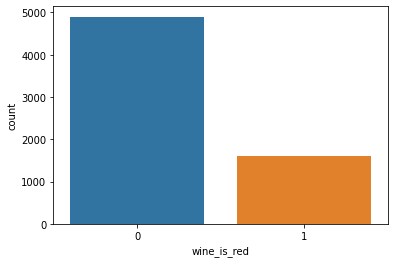

In [18]:
sns.countplot(wine['wine_is_red'])

##**Oversampling**



---

O método de Oversampling consiste e dulicar dados aleatórios do caso em que esxistem menos dados, no Dataset em questão aplicamos tal tática para os casos em que os vinhos são vermelhos.

---



In [19]:
#separando o Dataset em treino e test

x= wine.iloc[:,:-1].to_numpy()
y= wine.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [20]:
#criando o modelo de oversampling

from imblearn.over_sampling import RandomOverSampler

over=RandomOverSampler(sampling_strategy=1) 

wine_overx,wine_overy=over.fit_resample(x,y)

#juntando os dados e arrumando o Dataset novo.

wine_overx=pd.DataFrame(wine_overx)

wine_overy=pd.DataFrame(wine_overy)


wine_over=pd.concat([wine_overx, wine_overy],axis=1)

wine_over.columns=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	 'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates'	,'alcohol'	,'quality','wine_is_red']

wine_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6.0,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6.0,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6.0,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6.0,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,6.6,0.96,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,6.0,1
9792,6.5,0.61,0.00,2.2,0.095,48.0,59.0,0.99541,3.61,0.70,11.5,6.0,1
9793,5.6,0.66,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,5.0,1
9794,6.6,0.50,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


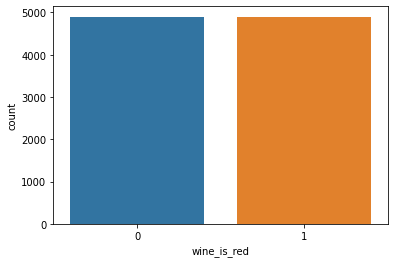

In [21]:
sns.countplot(wine_over['wine_is_red'])



---


Notamos que agora existem casos iguais de vinhos vermelhos e não vermelhos e  9796 fileiras de dados, ou seja um aumento de 3299 dados que foram duplicados.

---



##**Undersampling**



---


O método de Undersampling consiste e apagar dados aleatórios do caso em que esxistem mais dados, no Dataset em questão aplicamos tal tática para os casos em que os vinhos não são vermelhos.


---



In [22]:
#separando o Dataset em treino e test

x= wine.iloc[:,:-1].to_numpy()
y= wine.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)


In [23]:
#criando o modelo de undersampling


from imblearn.under_sampling import RandomUnderSampler

under=RandomUnderSampler(sampling_strategy=1) 

wine_underx,wine_undery=under.fit_resample(x,y)


#juntando os dados e arrumando o Dataset novo.

wine_underx=pd.DataFrame(wine_underx)

wine_undery=pd.DataFrame(wine_undery)


wine_under=pd.concat([wine_underx, wine_undery],axis=1)

wine_under.columns=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	 'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates'	,'alcohol'	,'quality','wine_is_red']

wine_under

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,7.0,0.160,0.25,14.3,0.044,27.0,149.0,0.99800,2.91,0.46,9.2,6.0,0
1,7.6,0.300,0.37,1.6,0.087,27.0,177.0,0.99438,3.09,0.50,9.8,5.0,0
2,6.4,0.260,0.26,1.1,0.052,22.0,176.0,0.99304,3.09,0.54,9.3,5.0,0
3,7.1,0.390,0.39,11.1,0.034,25.0,204.0,0.99616,3.05,0.52,10.0,6.0,0
4,6.6,0.250,0.30,1.6,0.046,32.0,134.0,0.99300,3.42,0.51,10.1,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.8,0.680,0.21,2.1,0.070,9.0,23.0,0.99546,3.38,0.60,10.3,5.0,1
3194,8.7,0.820,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5.0,1
3195,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6.0,1
3196,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


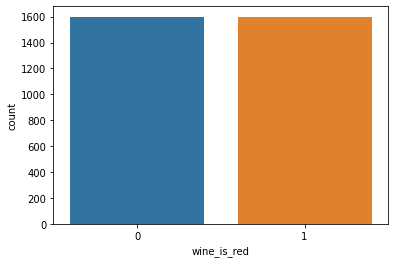

In [24]:
sns.countplot(wine_under['wine_is_red'])



---



Notamos que agora existem casos iguais de vinhos vermelhos e não vermelhos e  3198 fileiras de dados, ou seja uma diminuição de 3299 dados que foram apagados.


---

